### Introduction

In the following notebook, I will be conducting a market analysis where I intend to look into the following:
- What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?
- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.2f}'.format

#Set visualization preferences
plt.style.use('Solarize_Light2')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Exploratory_Data_Analysis'

**Read in data**

In [8]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in file
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', index_col=['last_review'],
                parse_dates=['last_review'])

#Sort data
df.sort_values('last_review', inplace = True)

### Data Overview

**Preview Data**

In [59]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (126258, 47)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
last_review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-01,1,"Wifi,Kitchen, Free street parking , Hot tub ,...",21,335,30,60,1.00,Real Bed,1.00,1.00,4,nan,nan,moderate,San Francisco,30.00,0.00,1,1.00,73070632,0.00,0.00,Tina,87.00,within a few hours,"email , phone , reviews , jumio , offlin...",18546459,0,1,37.71,-122.45,1125,6,nan,Outer Mission,7,45.00,Condominium,0,0,1,97.00,0.57,Private room,100.00,nan,94112.00
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",0,324,19,49,1.00,Real Bed,1.00,1.00,33,nan,nan,strict 14 with grace period,San Francisco,200.00,0.00,1,1.00,13832870,0.00,0.00,International,2.00,within an hour,"phone , reviews , jumio , offline governm...",18874655,0,1,37.80,-122.42,1125,30,nan,Russian Hill,2,148.00,Apartment,0,0,1,100.00,0.18,Entire home/apt,1500.00,nan,94133.00
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",29,364,59,89,1.00,Real Bed,1.00,1.00,32,nan,nan,strict 14 with grace period,San Francisco,200.00,0.00,1,1.00,13832870,0.00,0.00,International,96.00,within a few hours,"phone , reviews , jumio , offline governm...",18874655,0,1,37.80,-122.42,1125,30,nan,Russian Hill,2,144.00,Apartment,0,0,1,100.00,0.24,Entire home/apt,1500.00,nan,94133.00


# What was the loss in revenue due to COVID19? Where do you expect losses to be for the San Francisco are to be by the end of the year?

**Airbnb Gross Income in San Francisco

Text(2020-04-19, 100000, 'Shutdown Order\nIssued 3/19/2020')

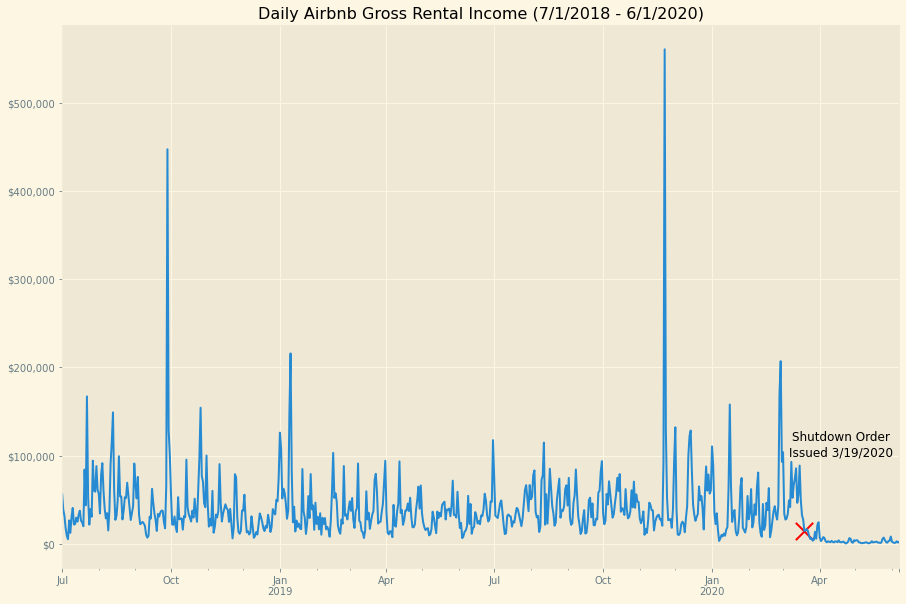

In [60]:
#Create fig
f, ax = plt.subplots(figsize = (15,10))

#Plot total revenue each day
df.groupby('last_review')['price'].sum().plot()
plt.scatter('2020-03-19', 14443, color = 'red',  marker='x',s=300,  edgecolors='black',
)

#Set plot aesthetics
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax.set_xlabel('')
ax.set_title('Daily Airbnb Gross Rental Income (7/1/2018 - 6/1/2020)')

plt.text('2020-04-19', 100_000, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='center',);

#Stay at home order March 19 2020

- How does the long term rental market compare to the of the tourist industry?
    - Which is more profitable? Is there evidence to suggest Airbnb should consider entering the rental housing market
    - Who are our most profitable hosts? Are people using Airbnb as a business or 

### Exploring Airbnb Ownership

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**
- Which of these owners are renting out the entire home/apartment properties?
- What kinds of properties are these and how do they compare to other hosts
- Are these hosts also Super Hosts?

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**

In [155]:
#Create dataframe that contains id, name, # of listings, #of properties,  gross income, and super host flag for each renter
host_metrics = pd.DataFrame(df.groupby(['host_id','host_name'])['id'].agg(total_listings = 'count'))
host_metrics['properties'] = df.groupby(['host_id','host_name'])['id'].nunique().values#,'unique_listings':pd.Series.nunique})
host_metrics['gross_income'] = df.groupby(['host_id','host_name'])['price'].sum().values
host_metrics['superhost?'] = df.groupby(['host_id','host_name'])['host_is_superhost'].sum().values
host_metrics['superhost?'] = host_metrics['superhost?'].apply(lambda x: False if x == 0 else True)
host_metrics['avg_monthly_bookings'] = host_metrics['total_listings']/24

#Tidy cols
host_metrics.sort_values(by = 'properties',ascending = False,inplace = True)
host_metrics = host_metrics.reindex(sorted(host_metrics.columns), axis=1)

#Check
display(host_metrics.head(25))

,,avg_monthly_bookings,gross_income,properties,superhost?,total_listings
host_id,host_name,,,,,
48005494,Zeus,82.21,381849.00,155,True,1973
219930816,Sonder (San Francisco),35.29,149725.00,107,False,847
4430421,Landmark,43.21,90084.00,64,False,1037
64646820,Michelle,28.67,134789.00,53,True,688
173206762,Stratford,23.08,42184.00,50,False,554
17042045,The Bartlett,26.00,61619.00,49,False,624
70722023,Michael,26.54,57202.00,49,True,637
103340667,Sheena,25.38,88086.00,44,False,609
117141107,Zarinah,32.58,59570.00,43,True,782


**What do we know about these hosts?**

** What kinds of properties do the top of the top have and how many?**

**What % of the total revenue are these people responsible for?**

- What kinds of properties are these and how do they compare to other hosts

4 of the top 5 hosts w/ most success on Airbnb are companies offering fully furnished apartments for rent in San Francisco

ValueError: min() arg is an empty sequence

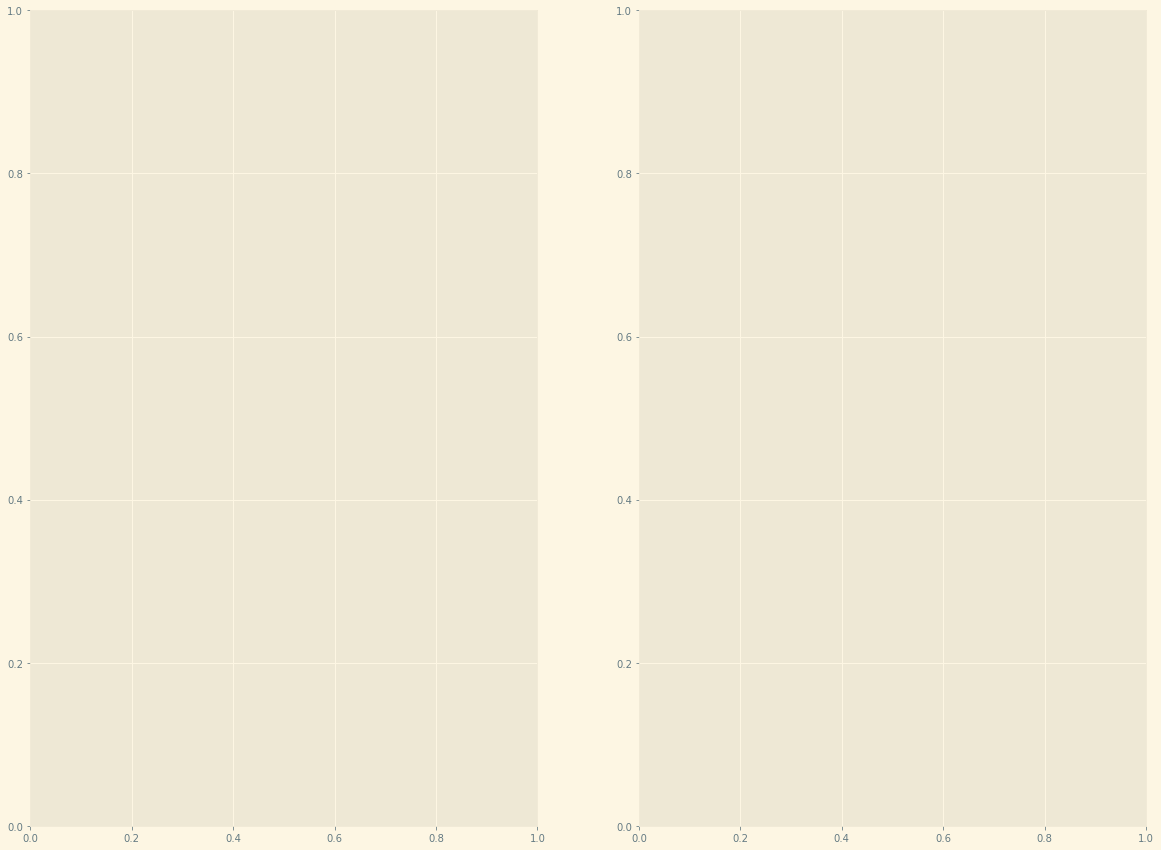

In [150]:
#Subsetting host_id's of the top 15
hosts = host_metrics[:15].index.tolist()

#Set figure
f, ax = plt.subplots(1,2, figsize = (20,15))

#Display kinds of properties available for rent
g =sns.countplot(y = 'property_type', order = df.property_type.loc[df.host_id.isin(hosts)].value_counts().index,
                 color='blue', alpha = .5,label = 'Listings Count',
              data = df.loc[df.host_id.isin(hosts)], ax = ax[0])

#Display kinds of properties of everyone else
j = sns.countplot(y = 'property_type', data = df.loc[~df.host_id.isin(hosts)],color='red', alpha = .5,label = 'Listings Count',
              order = df.property_type.loc[~df.host_id.isin(hosts)].value_counts().index,
              ax = ax[1])

###Set plot aesthetics###
#Title
plt.suptitle('Comparing Property Types of Airbnb Hosts\nTop Hosts Vs Other Hosts', y = 1.07, fontsize = 25, fontweight = 'semibold')

##Plot g##

#Title
g.set_title('Top Hosts',fontsize = 20, style = 'italic')

#Axes
g.set_xlabel('')
g.set_ylabel('')
g.tick_params(axis = 'both',labelsize = 14)
g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


#Legend
g.legend(shadow = True, fontsize = 16, loc = 'lower right')

##Plot j##
#Title
j.set_title('Other Users',fontsize = 20, style = 'italic')

#Axes
j.set_xlabel('')
j.set_ylabel('')
j.tick_params(axis = 'both',labelsize = 14)
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Legend
j.legend(shadow = True, fontsize = 16, loc = 'lower right')
f.tight_layout()

#Save to Visualizations file
plt.savefig(eda_path + '/property_comparisons.png', bbox_inches='tight')

### Comparing long-term rentals to local rent prices in San Francisco

**Prepare Data**

In [64]:
#Subset rows where monthly price is not na or minimum nights is >=28days
monthly_rent = df.loc[(df.minimum_nights >= 28)| ~(df.monthly_price.isna())]

#Fill missing monthly_price with price * minimum_nights
monthly_rent.monthly_price.fillna(monthly_rent.minimum_nights * monthly_rent.price, inplace = True)

#Check
display(monthly_rent.head(3))

C:\Users\kishe\Miniconda3\envs\Airbnb_Listings_Analysis\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
last_review,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",0,324,19,49,1.00,Real Bed,1.00,1.00,33,nan,nan,strict 14 with grace period,San Francisco,200.00,0.00,1,1.00,13832870,0.00,0.00,International,2.00,within an hour,"phone , reviews , jumio , offline governm...",18874655,0,1,37.80,-122.42,1125,30,4440.00,Russian Hill,2,148.00,Apartment,0,0,1,100.00,0.18,Entire home/apt,1500.00,nan,94133.00
2018-07-01,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",29,364,59,89,1.00,Real Bed,1.00,1.00,32,nan,nan,strict 14 with grace period,San Francisco,200.00,0.00,1,1.00,13832870,0.00,0.00,International,96.00,within a few hours,"phone , reviews , jumio , offline governm...",18874655,0,1,37.80,-122.42,1125,30,4320.00,Russian Hill,2,144.00,Apartment,0,0,1,100.00,0.24,Entire home/apt,1500.00,nan,94133.00
2018-07-01,2,"TV,Internet,Wifi,Heating,Washer,Dryer, Smoke ...",4,334,29,59,2.00,Real Bed,1.00,1.00,2,nan,nan,strict 14 with grace period,San Francisco,55.00,35.00,1,1.00,4501070,0.00,1.00,Polina,2.00,within an hour,"email , phone , facebook , reviews",1080933,0,1,37.74,-122.43,125,30,1975.00,Noe Valley,15,74.00,House,0,0,1,96.00,0.23,Private room,325.00,nan,94131.00


**Check price distribution w/ and w/o outliers

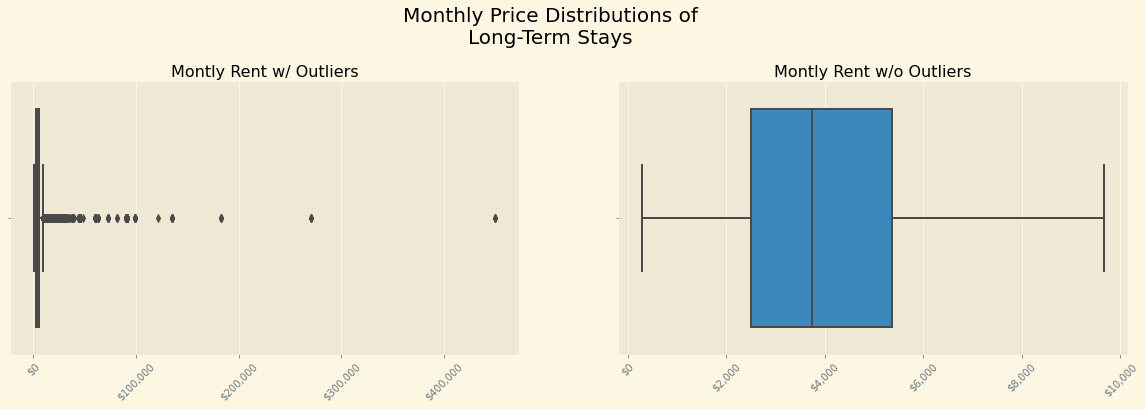

In [65]:
#Create figure
f, ax = plt.subplots(1,2,figsize = (20,5))

#Plot monthly prices, w/ and w/o outliers reflected
g = sns.boxplot(x = 'monthly_price', data = monthly_rent, showfliers = True, ax = ax[0])
j = sns.boxplot(x = 'monthly_price', data = monthly_rent, showfliers = False, ax = ax[1])

###Set plot aesthetics###
#Title
plt.suptitle('Monthly Price Distributions of\nLong-Term Stays', y = 1.09, fontsize = 20)

##Plot g##
#Title
g.set_title('Montly Rent w/ Outliers')

#Axes
g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
g.tick_params(axis='x', rotation=45)
g.set_xlabel('')

##Plot j##
#Title
j.set_title('Montly Rent w/o Outliers')

#Axes
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.tick_params(axis='x', rotation=45)
j.set_xlabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/monthly_rent_box.png', bbox_inches='tight')

**Remove outliers from monthly_rent and prepare as time series**

In [66]:
###Using IQR to remove outliers###
#Calulate IQR 
q1, q3 = np.quantile(monthly_rent.monthly_price, (.25, .75))
IQR = q3 - q1

#Calculate threshold
lower, upper = (q1 - (IQR * 1.5)),(q3 + (IQR * 1.5))

#Drop outliers from monthly_rent
monthly_rent = monthly_rent.loc[monthly_rent.monthly_price < upper]

#Subset cols for time series
time_series = monthly_rent.filter(regex ='monthly_price|last')

#Extract month_year
time_series['month_year'] = time_series.last_review.dt.to_period('M')

#Groupby month_year and capture mean and median of monthly_price
time_series = time_series.groupby('month_year')['monthly_price'].agg(['median','mean'])

#Check 
time_series.head()

AttributeError: 'DataFrame' object has no attribute 'last_review'

### Comparing local renter's market to Airbnb long-term hosts

**Read in/prepare Zillow Data**

In [152]:
#Read in Zillow data
zillow = pd.read_csv(path + '/2020_0526_Zillow_Cleaned.csv', index_col=0, parse_dates=['month_year'])

#Subset infromation pertaining to San Francisco and store as sf_rent
sf_rent = zillow.loc[zillow.regionname.str.contains('San Fran')]

#Set month_year as index
sf_rent.set_index('month_year', inplace = True)

#Check
display(sf_rent.head())

,regionname,rent
month_year,,
2014-01-01,"San Francisco, CA",2043.00
2014-02-01,"San Francisco, CA",2101.00
2014-03-01,"San Francisco, CA",2105.00
2014-04-01,"San Francisco, CA",2121.00
2014-05-01,"San Francisco, CA",2191.00


**SF Rental Time plot**

KeyError: 'mean'

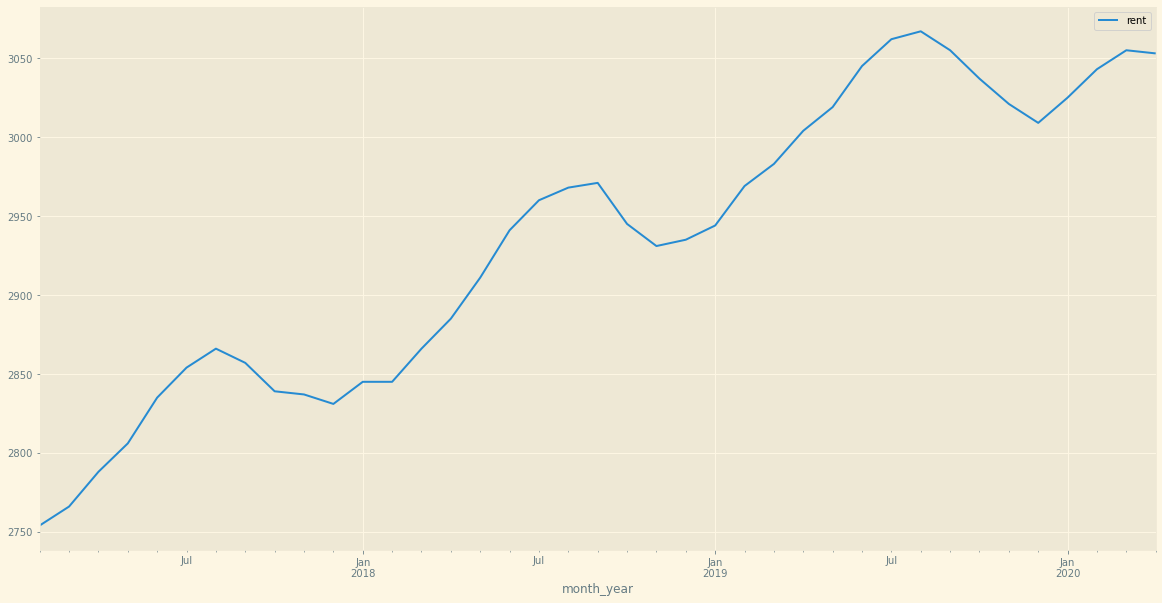

In [153]:
#Create figure
f, ax = plt.subplots(figsize = (20,10))

#Plot sf rental data
sf_rent.iloc[sf_rent.index > '2017-01-01'].plot(ax = ax, label = 'SF AVG Rent')

#Plot Airbnb data
time_series['mean'].iloc[time_series.index > '2017-01-01'].plot(ax = ax, label = 'Airbnb Avg Rent')
time_series.iloc[time_series.index > '2016-01-01']['mean'].rolling(12,6).mean().plot(ax = ax, label = 'SF AVG Rent')

###Set plot aesthetics###
#Title
ax.set_title('Can Long-Term Rent at Airbnb Compete with Local Housing Market?', fontweight = 'semibold', style = 'italic',fontsize = 16)

#Axes
ax.set_xlabel('')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

#Set xlim
ax.set_xlim('2017-01-01', '2020-04-01')

#Legend
ax.legend(['San Francisco Avg Rent', 'Airbnb Rental Avg', 'Airbnb Rental Avg Smoothed'],shadow = True, fontsize = 10);

#Save to Visualizations file
plt.savefig(eda_path + '/rent_comaprison.png', bbox_inches='tight')

Trends do seem to indicate that maybe one day Airbnb will be able to compete.